<a href="https://colab.research.google.com/github/thisara011/Automated-Cart-and-Cashier-Machine-/blob/main/full_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving unhealthy tomato2.jpg to unhealthy tomato2 (1).jpg


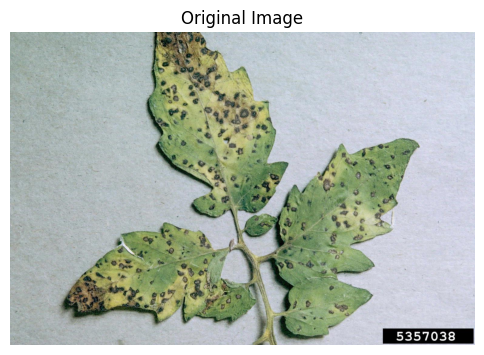

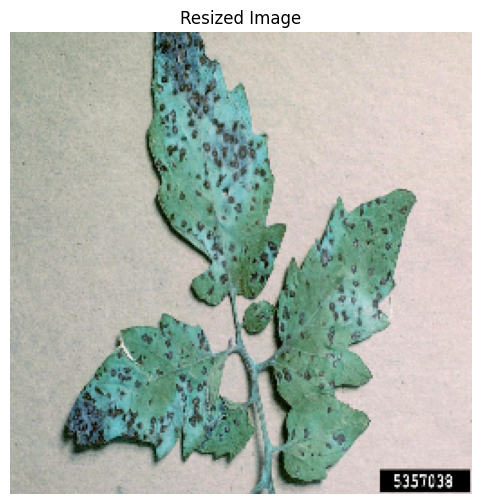

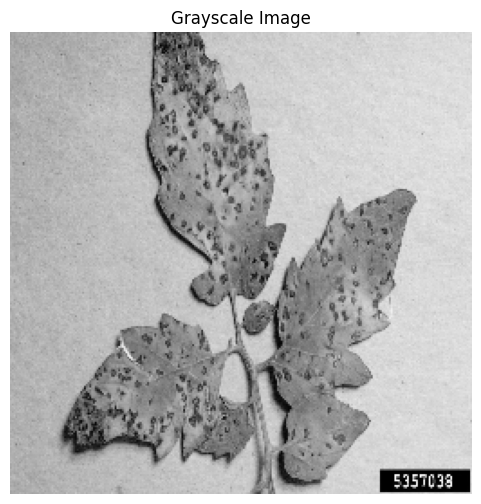

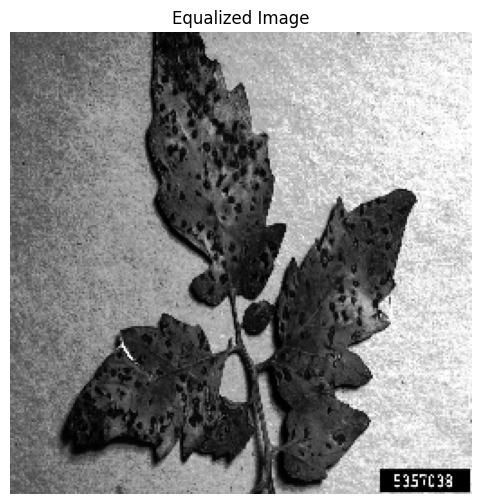

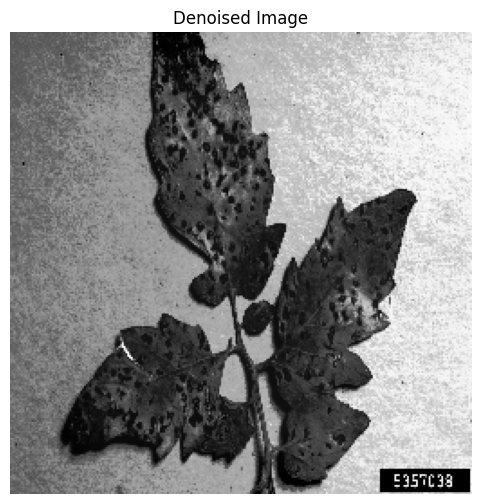

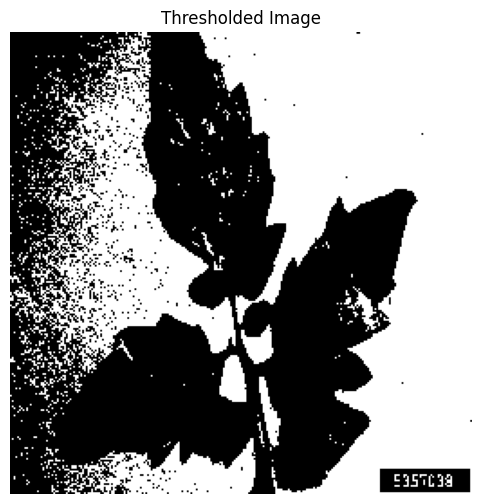

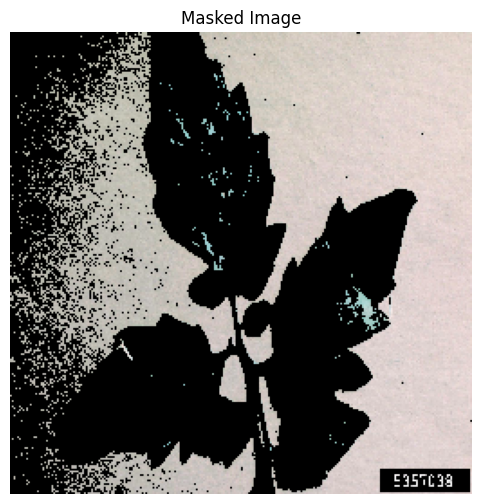

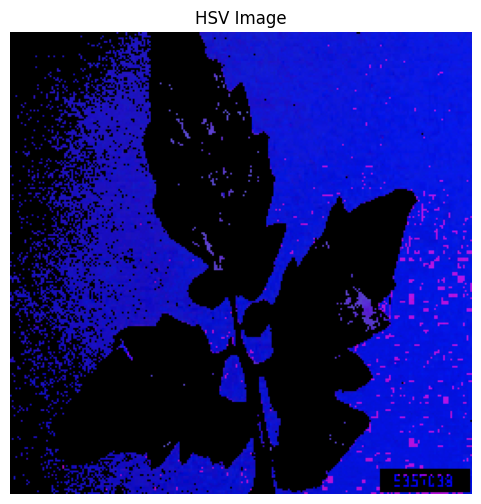

Fungus Area: 32883
Total Area: 65536
Ratio: 0.5017547607421875
Healthy Plant


In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage import exposure
from skimage.restoration import denoise_bilateral
from google.colab import files
import io
from PIL import Image

def upload_image():
    uploaded = files.upload()
    for file_name in uploaded.keys():
        img = Image.open(io.BytesIO(uploaded[file_name]))
        return np.array(img)

def display_image_with_text(image, title, cmap=None):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Step 2: Image Upload and Preprocessing
image = upload_image()
display_image_with_text(image, "Original Image")

# Resize the image
resized_image = cv2.resize(image, (256, 256))
display_image_with_text(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB), "Resized Image")

# Convert to grayscale
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
display_image_with_text(gray_image, "Grayscale Image", cmap='gray')

# Apply histogram equalization
equalized_image = exposure.equalize_hist(gray_image)
display_image_with_text(equalized_image, "Equalized Image", cmap='gray')

# Apply denoising
denoised_image = denoise_bilateral(equalized_image, sigma_color=0.05, sigma_spatial=15)
display_image_with_text(denoised_image, "Denoised Image", cmap='gray')

# Apply thresholding
_, thresh_image = cv2.threshold((denoised_image * 255).astype(np.uint8), 128, 255, cv2.THRESH_BINARY)
display_image_with_text(thresh_image, "Thresholded Image", cmap='gray')

# Create mask
mask = cv2.inRange(thresh_image, 128, 255)

# Apply mask to the original resized image
result_image = cv2.bitwise_and(resized_image, resized_image, mask=mask)
display_image_with_text(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB), "Masked Image")

# Convert to HSV
hsv_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2HSV)
display_image_with_text(hsv_image, "HSV Image")

# Calculate the area covered by the fungus
fungus_area = cv2.countNonZero(mask)

# Calculate the total area of the mask
total_area = mask.size

# Define a threshold ratio to classify the plant
threshold_ratio = 0.7  # Increase this value to reduce false positives

# Debug: Print the calculated values for inspection
print(f"Fungus Area: {fungus_area}")
print(f"Total Area: {total_area}")
print(f"Ratio: {fungus_area / total_area}")

# Classify the plant based on the ratio of fungus area to total area
if fungus_area / total_area > threshold_ratio:
    print("Diseased Plant")
else:
    print("Healthy Plant")
